# Usage Of Reference Data Module 
This notebook demonstrates the usage of Worldcereal Reference data module APIs

The project website: https://esa-worldcereal.org/en

The Worlcereal Reference Data Module website: https://ewoc-rdm-ui.iiasa.ac.at/

The complete documentation of reference data APIs can be found as swagger publish here - https://ewoc-rdm-api.iiasa.ac.at/swagger/index.html


1. Initialize Imports for Python scripts
2. Get All Public Collections
3. Get Features from a given collection (first collection in list)
4. Search Collections with Bounding Box, Land CoverTypes, Crop Types, Irrigation Types and Validity Time
5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time
6. Get Metadata of Collection 

# 1. Initialize Imports for Python scripts

In [1]:
##################Declarations#############################
import requests
import random

from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl, Popup, DrawControl, Rectangle) 

def random_color(feature):    
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

apiUrl = 'https://ewoc-rdm-api.iiasa.ac.at'

# 2. Get All Public Collections

In [2]:
import requests
collectionResponse = requests.get(f'{apiUrl}/collections')
collectionResponse.json()

{'totalCount': 72,
 'items': [{'collectionId': '2017afoneacrefundmelpoint110',
   'title': 'MEL agronomic survey eastern Africa, 2017',
   'featureCount': 3373,
   'type': 'Point',
   'accessType': 'Public',
   'typeOfObservationMethod': 'Unknown',
   'confidenceLandCover': 85,
   'confidenceCropType': 89,
   'confidenceIrrigationType': 0,
   'ewocCodes': [1000000000, 1101060000],
   'irrTypes': [0],
   'extent': {'spatial': {'bbox': [[34.05331037027546,
       -1.1181928808662311,
       35.39540334981372,
       1.1412347820301905]],
     'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
    'temporal': {'interval': [['2017-08-01T00:00:00', '2017-08-01T00:00:00']],
     'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
   'additionalData': '',
   'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
   'lastModificationTime': '2024-06-30T09:46:51.647052',
   'lastModifierId': '9c8e4c9b-1bb3-47da-8712-2c6db64ad892',
   'creationTime': '2024-06-26T10:13:48.646894',

# 3. Get Features from a given collection

In [3]:
collectionId = collectionResponse.json()['items'][0]['collectionId']

itemUrl = f'{apiUrl}/collections/{collectionId}/items'

itemsResponse = requests.get(itemUrl)
itemsResponse.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [34.93652635006367, 1.04557308366155]},
   'properties': {'sample_id': '2017_AF_One-Acre-Fund-MEL_POINT_110_2017_AF_OAF_POINT_11010',
    'ewoc_code': 1000000000,
    'irrigation_status': 0,
    'valid_time': '2017-08-01',
    'extract': 99,
    'quality_score_lc': 0,
    'quality_score_ct': 0,
    'h3_l3_cell': '837a48fffffffff'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [34.9238217998865, 1.1411102367336414]},
   'properties': {'sample_id': '2017_AF_One-Acre-Fund-MEL_POINT_110_2017_AF_OAF_POINT_11012',
    'ewoc_code': 1000000000,
    'irrigation_status': 0,
    'valid_time': '2017-08-01',
    'extract': 0,
    'quality_score_lc': 0,
    'quality_score_ct': 0,
    'h3_l3_cell': '837a48fffffffff'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [34.93581231000577, 1.049057779702343]},
   'properties': {'sample

# 4. Search Collections with Bounding Box and Validity Time
The data APIs provide a way to search for collections with filter parameters. Refer the swagger documentation for filter details.
The below script demonstrates how we can call the REST APIs to search for the collections.

## Search Bounding Box

In [4]:
center=[-1.18,34.54]
zoom=4
m1=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)
#-6.926427,28.696289,4.434044,40.605469
aoi = Rectangle(bounds=[[ -6.926427,28.696289], [ 4.434044,40.605469]], color="tomato", weight=2) 

#add layers
m1.add_layer(aoi)

# display map
m1

Map(center=[-1.18, 34.54], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [5]:
import requests

# Parameters
bbox='&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044' #bbox: minimum longitude, minimum latitude, maximum longitude and maximum latitude 
valTime='ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z' # date time in yyyy-MM-ddTHH:mm:ssZ format with url escaped
ewocCodes='&CropTypes=1201020020&CropTypes=1101080000&CropTypes=1201000000&CropTypes=1107000040&CropTypes=1103030000&CropTypes=1103110070&CropTypes=1201030040&CropTypes=1105010010&CropTypes=1103010010&CropTypes=4300000000&CropTypes=7000000000&CropTypes=1101060000&CropTypes=1103060000&CropTypes=1103020050&CropTypes=1106000020&CropTypes=1000000000&CropTypes=1201010000&CropTypes=1103090040&CropTypes=1103000000&CropTypes=1300000000&CropTypes=1101070030&CropTypes=1111010100&CropTypes=1107000020&CropTypes=2000000000&CropTypes=1107000010&CropTypes=1103010020'
# wheat, winter wheat and spring wheat
irrTypes='&irrTypes=0'
# crop confidence of 60 to 99
cropConfidence='&CropTypeConfidence.Start=60&CropTypeConfidence.End=99'

colSearchUrl=f'{apiUrl}/collections/search??MaxResultCount=100&{bbox}&?{valTime}{ewocCodes}{irrTypes}{cropConfidence}'
#https://ewoc-rdm-api.iiasa.ac.at/collections/search??MaxResultCount=100&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&?ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&CropTypes=1201020020&CropTypes=1101080000&CropTypes=1201000000&CropTypes=1107000040&CropTypes=1103030000&CropTypes=1103110070&CropTypes=1201030040&CropTypes=1105010010&CropTypes=1103010010&CropTypes=4300000000&CropTypes=7000000000&CropTypes=1101060000&CropTypes=1103060000&CropTypes=1103020050&CropTypes=1106000020&CropTypes=1000000000&CropTypes=1201010000&CropTypes=1103090040&CropTypes=1103000000&CropTypes=1300000000&CropTypes=1101070030&CropTypes=1111010100&CropTypes=1107000020&CropTypes=2000000000&CropTypes=1107000010&CropTypes=1103010020&irrTypes=0&CropTypeConfidence.Start=60&CropTypeConfidence.End=99
print(colSearchUrl)
colSearchResponse = requests.get(colSearchUrl)
cols = colSearchResponse.json()
print(len(cols))
colSearchResponse.json()

https://ewoc-rdm-api.iiasa.ac.at/collections/search??MaxResultCount=100&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&?ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&CropTypes=1201020020&CropTypes=1101080000&CropTypes=1201000000&CropTypes=1107000040&CropTypes=1103030000&CropTypes=1103110070&CropTypes=1201030040&CropTypes=1105010010&CropTypes=1103010010&CropTypes=4300000000&CropTypes=7000000000&CropTypes=1101060000&CropTypes=1103060000&CropTypes=1103020050&CropTypes=1106000020&CropTypes=1000000000&CropTypes=1201010000&CropTypes=1103090040&CropTypes=1103000000&CropTypes=1300000000&CropTypes=1101070030&CropTypes=1111010100&CropTypes=1107000020&CropTypes=2000000000&CropTypes=1107000010&CropTypes=1103010020&irrTypes=0&CropTypeConfidence.Start=60&CropTypeConfidence.End=99
15


[{'collectionId': '2017ugaradiantearth01poly110',
  'title': 'Crop Type, Uganda, 2017',
  'featureCount': 233,
  'type': 'Polygon',
  'accessType': 'Public',
  'typeOfObservationMethod': 'Unknown',
  'confidenceLandCover': 98,
  'confidenceCropType': 98,
  'confidenceIrrigationType': 0,
  'ewocCodes': [1101060000, 1101070030],
  'irrTypes': [0],
  'extent': {'spatial': {'bbox': [[33.5466817,
      1.4271017,
      35.00013415,
      3.7269467000000014]],
    'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
   'temporal': {'interval': [['2017-08-01T00:00:00', '2017-08-01T00:00:00']],
    'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
  'additionalData': '',
  'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
  'lastModificationTime': None,
  'lastModifierId': None,
  'creationTime': '2024-06-26T10:14:30.567669',
  'creatorId': None,
  'id': '3a136637-01a7-088d-84af-02813d7d3bd5'},
 {'collectionId': '2018afoafpoint110',
  'title': 'MEL agronomic survey easter

Display results on map

In [6]:
center=[-1.18,34.54]
zoom=4
m2=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

cols = colSearchResponse.json()

for col in cols:
  colbbox = col['extent']['spatial']['bbox'][0]
  bbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
  aoi2 = Rectangle(bounds=bbox, color="green", weight=2 ) 
  m2.add_layer(aoi2)

aoi = Rectangle(bounds=[[ -6.926427,28.696289], [ 4.434044,40.605469]], color="tomato", weight=2) 

#add Search BBOx on top
m2.add_layer(aoi)

# display map
m2

Map(center=[-1.18, 34.54], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

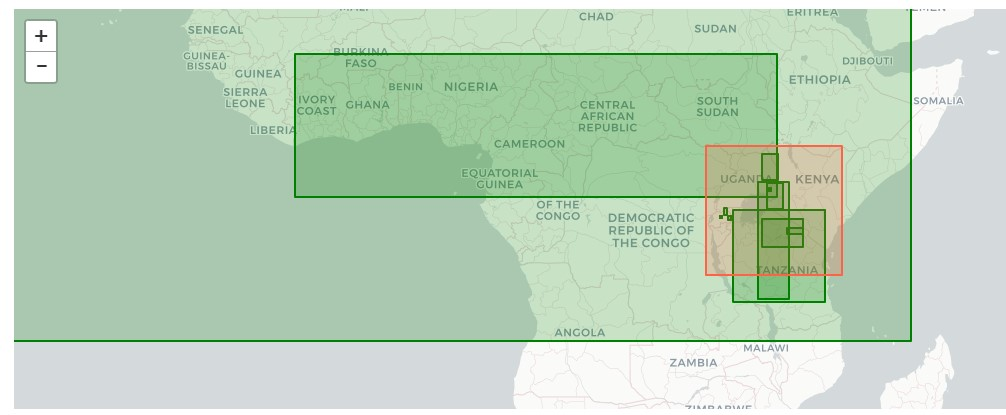

In [17]:
from IPython.display import Image
Image(filename='searchImage.jpg') 

# 5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time


In [7]:
colbbox = cols[0]['extent']['spatial']['bbox'][0]
itembbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
print(cols[0]['collectionId'])
print(itembbox)
itemSearchCollectionId=cols[0]['collectionId']
itemSearchUrl = f'{apiUrl}/collections/{itemSearchCollectionId}/items'
print(itemSearchUrl)
#'https://ewoc-rdm-api.iiasa.ac.at/collections/2023idnvitomanualpoint100/items'
itemSearchResponse = requests.get(itemSearchUrl)
itemSearchResponse.json()

2017ugaradiantearth01poly110
[[1.4271017, 33.5466817], [3.7269467000000014, 35.00013415]]
https://ewoc-rdm-api.iiasa.ac.at/collections/2017ugaradiantearth01poly110/items


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[34.75433, 1.8488800000000003],
      [34.75408, 1.84847],
      [34.75438, 1.8482600000000002],
      [34.7547, 1.84863],
      [34.75433, 1.8488800000000003]]]},
   'properties': {'sample_id': '2017_UGA_RadiantEarth-01_POLY_110_1',
    'ewoc_code': 1101060000,
    'irrigation_status': 0,
    'valid_time': '2017-08-01',
    'extract': 99,
    'quality_score_lc': 0,
    'quality_score_ct': 98,
    'h3_l3_cell': '837a48fffffffff'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[34.52793, 1.92873],
      [34.52809, 1.9282699999999997],
      [34.52865, 1.9284300000000003],
      [34.52847, 1.9290500000000004],
      [34.52793, 1.92873]]]},
   'properties': {'sample_id': '2017_UGA_RadiantEarth-01_POLY_110_2',
    'ewoc_code': 1101070030,
    'irrigation_status': 0,
    'valid_time': '2017-08-01',
    'extract': 99,
    'quality_score_lc':

## Display Result on Map. 
The APIs are page based, the skip and max count needs to be used to get all the results page wise

In [9]:
from ipywidgets import Text, HTML
center=[0.08,36.54]
zoom=6
m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom,close_popup_on_click=False)

aoi = Rectangle(bounds=itembbox, color="green", weight=2) 

data = itemSearchResponse.json()
layer= GeoJSON(
    data=data,
    style={
        'opacity': 1, 'fillOpacity': 0.5, 'weight': 2
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    style_callback=random_color
)


#add layers
m.add_layer(aoi)
m.add_layer(layer)

# display map
m




Map(center=[0.08, 36.54], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text…

Below Image is sample output only.

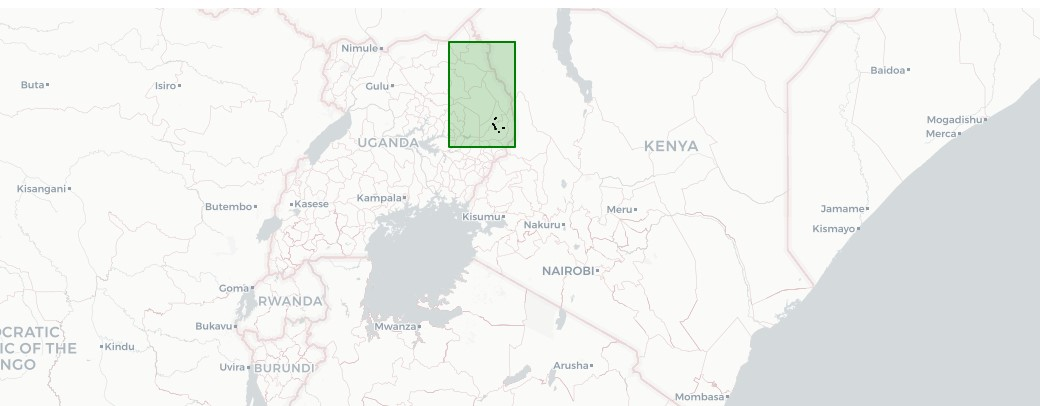

In [10]:
from IPython.display import Image
Image(filename='image.jpg') 

# 6. Get Metadata of Collection

Get Json

In [14]:
colId = '2017ugaradiantearth01poly110'
metadataUrl = f'{apiUrl}/collections/{colId}/metadata/items'
metadata = requests.get(metadataUrl)
metadata.json()

[{'id': 3,
  'name': 'OriginalDataSet:Provider:Code:',
  'value': 'Dalberg - RadiantEarth',
  'type': 'text'},
 {'id': 4,
  'name': 'OriginalDataSet:Provider:DescriptionCuratedDataSet:',
  'value': 'Dalberg Data Insights and Radiant Earth Foundation',
  'type': 'text'},
 {'id': 5,
  'name': 'OriginalDataSet:Provider:URL:',
  'value': 'https://dalberg.com; https://www.radiant.earth/',
  'type': 'text'},
 {'id': 6,
  'name': 'OriginalDataSet:Provider:Contact:',
  'value': 'Christophe Bocquet, Christophe.Bocquet@dalberg.com',
  'type': 'text'},
 {'id': 7,
  'name': 'OriginalDataSet:NameDataSet::',
  'value': 'Dalberg Data Insights Crop Type Uganda',
  'type': 'text'},
 {'id': 8,
  'name': 'OriginalDataSet:DOI::',
  'value': 'doi.org/10.34911/rdnt.eii04x',
  'type': 'text'},
 {'id': 9,
  'name': 'OriginalDataSet:License:TypeOfLicense:',
  'value': 'CC_BY_SA',
  'type': 'text'},
 {'id': 10,
  'name': 'OriginalDataSet:License:ReferenceToLicense:',
  'value': 'CC-BY-SA-4.0',
  'type': 'text'}

Get Excel

<Response [200]>
2017ugaradiantearth01poly110_metadata.xlsx saved to local path


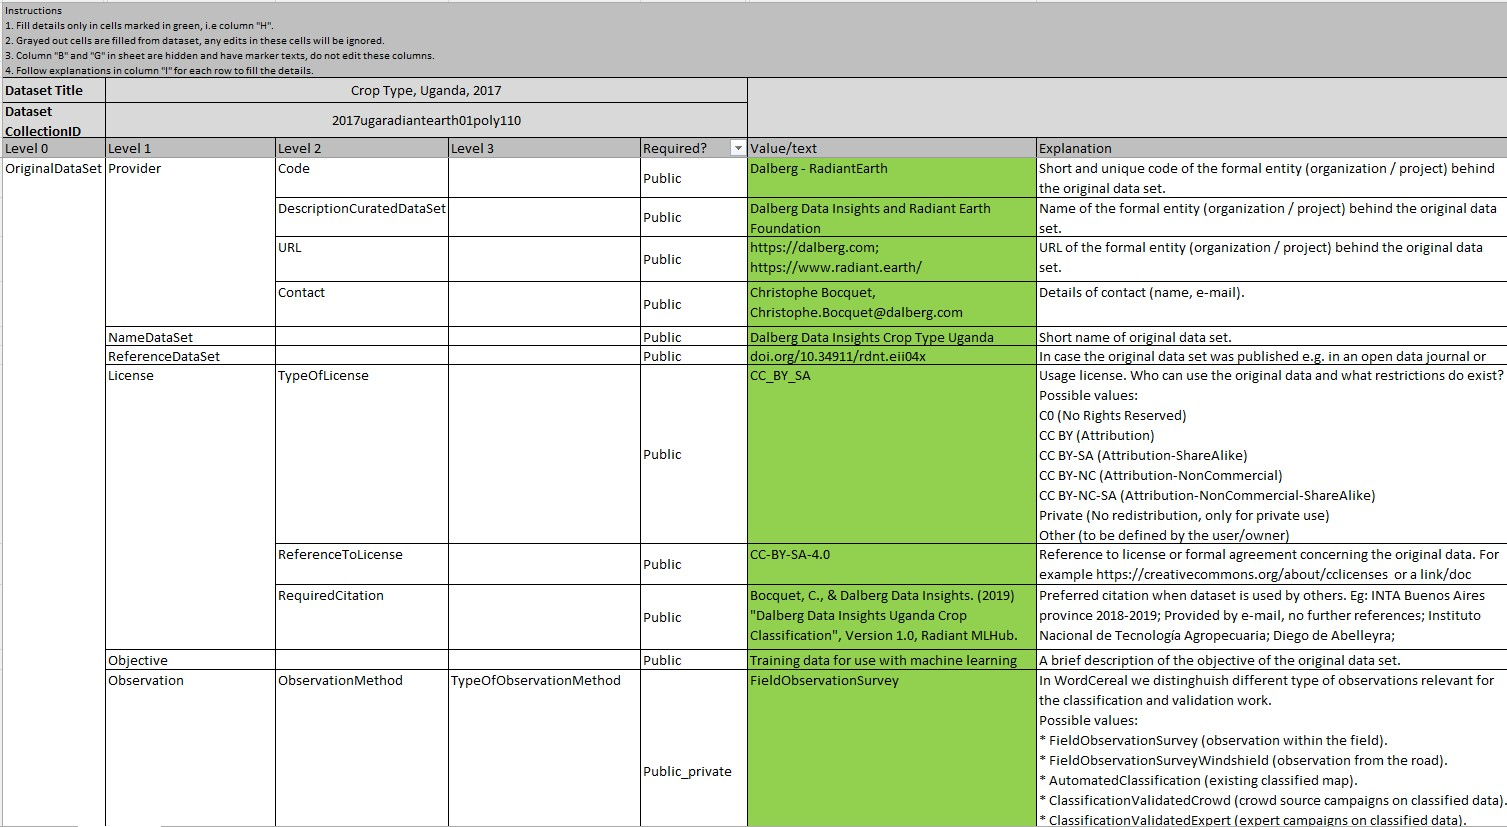

In [16]:
excelUrl = f'{apiUrl}/collections/{colId}/metadata/download'
response = requests.get(excelUrl)
print(response)
fileName=f"{colId}_metadata.xlsx"
open(fileName, "wb").write(response.content)
print(f"{fileName} saved to local path")
# Sample Excel Output
Image(filename='meta.jpg') 
